In [1]:
import numpy as np
import pygimli as pg
import pygimli.physics.traveltime as tt
!pip install pandas
import pandas as pd

In [2]:
from pygimli.physics import TravelTimeManager

In [3]:
#data = tt.load("test.sgt", load=True, verbose=True)
data = tt.load("full_profil.dat", load=True, verbose=True)
data["t"] = data["t"]*1000
print(data)

Data: Sensors: 169 data: 843, nonzero entries: ['g', 's', 't', 'valid']


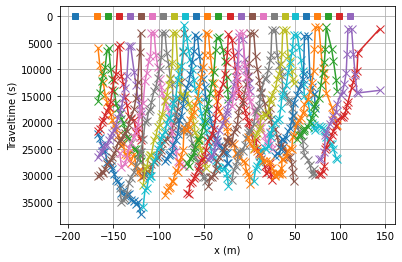

In [4]:
fig, ax = pg.plt.subplots()
pg.physics.traveltime.drawFirstPicks(ax, data)

3 data of 843 not shown
[773, 774, 775]


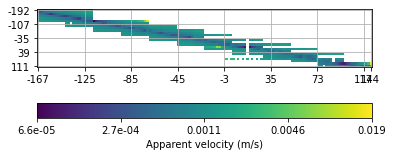

In [5]:
""" Alternatively, one can plot a matrix plot of apparent velocities which is the
more general function also making sense for crosshole data."""
mgr = TravelTimeManager(data)
ax, cbar = mgr.showData(data)

In [7]:
#testing errors in traveltimes and troubleshooting bugs
#TravelTimeManager().estimateError(data["t"], errLevel=0.01, absError=None)
data['err'] = mgr.estimateError(data['t'], errLevel=0.01, absError=1e-9)
data["t"] = data["t"]>0
#data.remove(data['t'] < 0)
print("longueur de cette donnée est égale à:",data['err'])
data

longueur de cette donnée est égale à: 843 [0.010000001,...,0.010000001]


Data: Sensors: 169 data: 843, nonzero entries: ['err', 'g', 's', 't', 'valid']

In [ ]:
mgr.invert(data, secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=100, vBottom=7500,
           verbose=1)

ax, cbar = mgr.showResult(logScale=True)
mgr.drawRayPaths(ax=ax, color="w", lw=0.3, alpha=0.5)

03/03/22 - 00:51:10 - pyGIMLi - INFO - Found 1 regions.
03/03/22 - 00:51:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/03/22 - 00:51:12 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
03/03/22 - 00:51:15 - pyGIMLi - INFO - Starting inversion.
03/03/22 - 00:51:16 - pyGIMLi - INFO - Create gradient starting model. 100: 7500


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000002A207571AE0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000002A17F55A270>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002A17F4C7880>
min/max (data): 1/1
min/max (error): 1.60%/37.20%


03/03/22 - 00:51:17 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00966172 0.00078179 0.00935071 ... 0.00017487 0.00017323 0.0001718 ]


In [ ]:
fig = mgr.showResultAndFit()
mgr.saveResult()